## Task 2

### importing libraries and installing required libraries
##### installing libraries


In [1]:
!pip install requests
!pip install beautifulsoup4
!pip install nltk
!pip install scikit-learn
!pip install matplotlib
!pip install wordcloud

In [2]:
!pip install --upgrade Pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 37.0 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.2.0 which is incompatible.


##### downloading stopwords

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

##### importing libraries

In [4]:
import requests
from bs4 import  BeautifulSoup
import csv
import pandas as pd
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

### importing the dataset

The dataset was taken from kaggle website:<br> https://www.kaggle.com/datasets/gpreda/bbc-news?resource=download

In [5]:
df = pd.read_csv('bbc_news.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29282 entries, 0 to 29281
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        29282 non-null  object
 1   pubDate      29282 non-null  object
 2   guid         29282 non-null  object
 3   link         29282 non-null  object
 4   description  29282 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


### Data preprocessing

#### Counting the number of na/null values

In [7]:
nan_count = df.isnull().sum().sum()
print('Number of NaN values:', nan_count)

Number of NaN values: 0


In [8]:
df.tail()

,title,pubDate,guid,link,description
29277,West Ham 0-6 Arsenal: 'Massive' result puts Ar...,"Sun, 11 Feb 2024 18:29:57 GMT",https://www.bbc.co.uk/sport/football/68269805,https://www.bbc.co.uk/sport/football/68269805?...,Arsenal backed up their win against Liverpool ...
29278,Afcon 2023 final: Nigeria 1-2 Ivory Coast - hi...,"Sun, 11 Feb 2024 22:20:24 GMT",https://www.bbc.co.uk/sport/av/football/68270648,https://www.bbc.co.uk/sport/av/football/682706...,Watch highlights as hosts Ivory Coast come fro...
29279,Women's FA Cup: Chelsea edge past Crystal Pala...,"Sun, 11 Feb 2024 18:07:08 GMT",https://www.bbc.co.uk/sport/football/68268377,https://www.bbc.co.uk/sport/football/68268377?...,British record signing Mayra Ramirez scores he...
29280,Six Nations: James Lowe scores brilliant solo ...,"Sun, 11 Feb 2024 18:47:09 GMT",https://www.bbc.co.uk/sport/av/rugby-union/682...,https://www.bbc.co.uk/sport/av/rugby-union/682...,"Watch James Lowe's brilliant ""one-man effort' ..."
29281,Aston Villa 1-2 Man Utd: Why Villa will still ...,"Sun, 11 Feb 2024 23:15:01 GMT",https://www.bbc.co.uk/sport/football/68269251,https://www.bbc.co.uk/sport/football/68269251?...,MOTD2 pundit Stephen Warnock still believes Un...


#### removing duplicate data

In [9]:
df_unique = df.drop_duplicates()
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29282 entries, 0 to 29281
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        29282 non-null  object
 1   pubDate      29282 non-null  object
 2   guid         29282 non-null  object
 3   link         29282 non-null  object
 4   description  29282 non-null  object
dtypes: object(5)
memory usage: 1.3+ MB


#### removing unnecessary columns like pubDate and Links

In [10]:
columns_to_remove = ['pubDate', 'link']
df_filtered = df_unique.drop(columns=columns_to_remove)

In [11]:
df_filtered.head()

,title,guid,description
0,Ukraine: Angry Zelensky vows to punish Russian...,https://www.bbc.co.uk/news/world-europe-60638042,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,https://www.bbc.co.uk/news/world-europe-60641873,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',https://www.bbc.co.uk/news/business-60623941,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,https://www.bbc.co.uk/news/uk-60579079,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,https://www.bbc.co.uk/news/business-60642786,Consumers are feeling the impact of higher ene...


### Clustering using K-means

In [40]:
# Combine relevant columns into a text feature for clustering
text_feature = df_filtered['title'] + ' ' + df_filtered['title']  # You can customize this based on your features

# Use TfidfVectorizer to convert text data into a numerical format, removing stopwords
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_feature)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can change the number of clusters as needed
df_filtered['cluster'] = kmeans.fit_predict(X)

# Display the DataFrame with cluster assignments
print("DataFrame with cluster assignments:")
print(df_filtered)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


DataFrame with cluster assignments:
                                                   title  \
0      Ukraine: Angry Zelensky vows to punish Russian...   
1      War in Ukraine: Taking cover in a town under a...   
2             Ukraine war 'catastrophic for global food'   
3      Manchester Arena bombing: Saffie Roussos's par...   
4      Ukraine conflict: Oil price soars to highest l...   
...                                                  ...   
29277  West Ham 0-6 Arsenal: 'Massive' result puts Ar...   
29278  Afcon 2023 final: Nigeria 1-2 Ivory Coast - hi...   
29279  Women's FA Cup: Chelsea edge past Crystal Pala...   
29280  Six Nations: James Lowe scores brilliant solo ...   
29281  Aston Villa 1-2 Man Utd: Why Villa will still ...   

                                                    guid  \
0       https://www.bbc.co.uk/news/world-europe-60638042   
1       https://www.bbc.co.uk/news/world-europe-60641873   
2           https://www.bbc.co.uk/news/business-60623941   
3  

#### The numbers of clusters formed with their count

In [41]:
df_filtered['cluster'].value_counts()

2    22429
0     5398
1     1455
Name: cluster, dtype: int64

In [42]:
for cluster_num in range(df_filtered['cluster'].nunique()):
    cluster_description = df_filtered[df_filtered['cluster'] == cluster_num]['description']

    print(f'\nCluster {cluster_num} Descriptions:')
    print(cluster_description.values)



Cluster 0 Descriptions:
["The parents of the Manchester Arena bombing's youngest victim speak about their life since she died."
 'Several US presidents have failed to get the measure of him but now Europe has joined the fray things may change.'
 'Maxim, a 27-year-old city resident, tells the BBC what happened after the first ceasefire collapsed.'
 ...
 'The retailer is expected to undergo a major restructure, leading to shop closures and job losses.'
 'A selection of striking images from our readers around the world.'
 "MOTD2 pundit Stephen Warnock still believes Unai Emery's know-how will help Aston Villa make the Champions League spots despite their drop in form."]

Cluster 1 Descriptions:
['The Ukrainian president says the country will not forgive or forget those who murder its civilians.'
 'Jeremy Bowen was on the frontline in Irpin, as residents came under Russian fire while trying to flee.'
 "One of the world's biggest fertiliser firms says the conflict could deliver a shock to 

### Generating Wordcloud

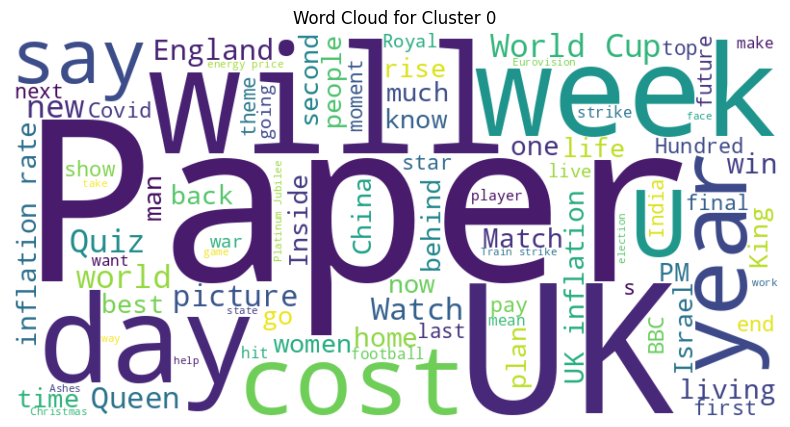

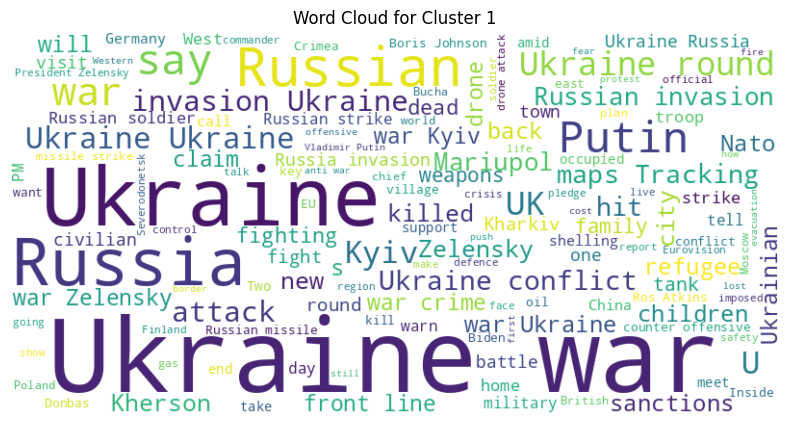

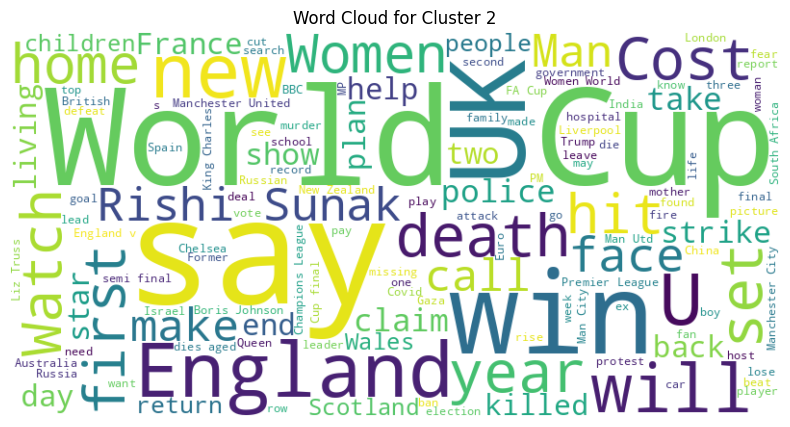

In [43]:
# Generate word clouds for each cluster
for cluster_num in range(df_filtered['cluster'].nunique()):
    cluster_text = ' '.join(text_feature[df_filtered['cluster'] == cluster_num])

    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words, min_font_size=10).generate(cluster_text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster_num}')
    plt.axis('off')
    plt.show()


#### Mapping with cluster names

In [44]:
# Create a mapping for cluster names
cluster_names_mapping = {0: 'Current Affairs', 1: 'Foreign Politics', 2: 'Sports'}

# Map cluster numbers to names
df_filtered['cluster_name'] = df_filtered['cluster'].map(cluster_names_mapping)

# Display the DataFrame with cluster names
print("DataFrame with Cluster Names:")
print(df_filtered[['description', 'cluster_name']])


DataFrame with Cluster Names:
                                             description      cluster_name
0      The Ukrainian president says the country will ...  Foreign Politics
1      Jeremy Bowen was on the frontline in Irpin, as...  Foreign Politics
2      One of the world's biggest fertiliser firms sa...  Foreign Politics
3      The parents of the Manchester Arena bombing's ...   Current Affairs
4      Consumers are feeling the impact of higher ene...  Foreign Politics
...                                                  ...               ...
29277  Arsenal backed up their win against Liverpool ...            Sports
29278  Watch highlights as hosts Ivory Coast come fro...            Sports
29279  British record signing Mayra Ramirez scores he...            Sports
29280  Watch James Lowe's brilliant "one-man effort' ...            Sports
29281  MOTD2 pundit Stephen Warnock still believes Un...   Current Affairs

[29282 rows x 2 columns]


#### Testing

In [47]:
given_text = "Super Bowl 2024: Kansas City Chiefs defend NFL title after beating San Francisco 49ers in overtime"

predicted_cluster = kmeans.predict(vectorizer.transform([given_text]))[0]

print(f"The given text belongs to Cluster {predicted_cluster}")

The given text belongs to Cluster 2
